In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot  as plt 
import seaborn as sns 
import scipy as py 


import tensorflow as tf  
from tensorflow import keras 
from keras import Sequential  
from keras.layers import Dense

from tensorflow.keras.utils import plot_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.plotting import plot_decision_regions 

In [28]:
!pip install pydot

In [2]:
data = load_breast_cancer()

In [3]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
brest_cancer = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
brest_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
brest_cancer['target'] = data.target
brest_cancer.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
165,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.01939,0.1515,0.05266,...,25.82,102.3,782.1,0.1045,0.09995,0.0775,0.05754,0.2646,0.06085,1
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,...,21.51,111.4,862.1,0.1294,0.33710,0.3755,0.14140,0.3053,0.08764,1
433,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,...,30.93,145.3,1603.0,0.1390,0.34630,0.3912,0.17080,0.3007,0.08314,0
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,...,18.91,150.1,1610.0,0.1478,0.56340,0.3786,0.21020,0.3751,0.11080,0
262,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,...,27.24,137.9,1295.0,0.1134,0.28670,0.2298,0.15280,0.3067,0.07484,0


In [7]:
print(brest_cancer.shape )

(569, 31)


In [8]:
print(brest_cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
no_values = brest_cancer.isnull().sum()
print(f"here we printing the no values {no_values}")

here we printing the no values mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [10]:
no_values = brest_cancer.duplicated().sum()
print(f"Here duplicate values {no_values}")

Here duplicate values 0


In [11]:
brest_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
brest_cancer.describe().corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.999877,0.970933,-0.063887,0.999334,0.999344,0.999347,0.999337,0.999340,0.999331,...,0.999544,0.940451,-0.129715,0.999337,0.999378,0.999387,0.999341,0.999358,0.999336,0.999371
mean texture,0.999877,1.000000,0.974545,-0.049627,0.998642,0.998655,0.998660,0.998645,0.998651,0.998637,...,0.999889,0.945561,-0.115956,0.998645,0.998705,0.998718,0.998651,0.998675,0.998645,0.998695
mean perimeter,0.970933,0.974545,1.000000,0.161792,0.961559,0.961631,0.961662,0.961578,0.961606,0.961533,...,0.977627,0.993911,0.090525,0.961579,0.961902,0.961976,0.961612,0.961738,0.961575,0.961852
mean area,-0.063887,-0.049627,0.161792,1.000000,-0.097546,-0.097230,-0.097073,-0.097420,-0.097401,-0.097631,...,-0.037339,0.269137,0.995178,-0.097483,-0.096155,-0.095828,-0.097317,-0.096908,-0.097465,-0.096521
mean smoothness,0.999334,0.998642,0.961559,-0.097546,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997787,0.927561,-0.162158,1.000000,0.999999,0.999998,1.000000,1.000000,1.000000,0.999998
mean compactness,0.999344,0.998655,0.961631,-0.097230,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997804,0.927667,-0.161841,1.000000,0.999999,0.999999,1.000000,1.000000,1.000000,0.999998
mean concavity,0.999347,0.998660,0.961662,-0.097073,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997811,0.927715,-0.161680,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,0.999998
mean concave points,0.999337,0.998645,0.961578,-0.097420,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997791,0.927594,-0.162026,1.000000,0.999999,0.999999,1.000000,1.000000,1.000000,0.999998
mean symmetry,0.999340,0.998651,0.961606,-0.097401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997799,0.927623,-0.162021,1.000000,0.999999,0.999999,1.000000,1.000000,1.000000,0.999998
mean fractal dimension,0.999331,0.998637,0.961533,-0.097631,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.997781,0.927527,-0.162239,1.000000,0.999999,0.999998,1.000000,1.000000,1.000000,0.999998


In [13]:
brest_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
x = brest_cancer.drop(columns=['target'])
y = brest_cancer['target']

In [15]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [18]:
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [19]:
x_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165


In [20]:
y_test

421    1
47     0
292    1
186    0
414    0
      ..
172    0
3      0
68     1
448    1
442    1
Name: target, Length: 114, dtype: int32

In [21]:
y_train 

408    0
4      0
307    1
386    1
404    1
      ..
129    0
144    1
72     0
235    1
37     1
Name: target, Length: 455, dtype: int32

In [22]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [23]:
x_train_scaler

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [24]:
x_test_scaler 

array([[ 0.1318529 , -1.22289689,  0.22619275, ..., -0.07497962,
        -0.09827233,  0.50779424],
       [-0.28874137, -0.15799931, -0.26406701, ...,  1.38865765,
         1.72716717,  2.06060854],
       [-0.34961686, -0.75871076, -0.3778201 , ..., -0.15264201,
         0.84251802,  0.73392057],
       ...,
       [-1.43458406, -0.46063046, -1.35313261, ...,  0.88385214,
         2.28517664,  2.03655255],
       [ 0.08757982, -0.00327061,  0.06717876, ..., -0.29691482,
        -0.70391675, -0.54164842],
       [-0.11995025, -0.81104547, -0.16833819, ..., -1.23513619,
        -1.74508076, -0.9343625 ]])

In [25]:
# now using the Sequential model uisng the keras lib 
model = Sequential()
# here we creating the nn with diff layer
model.add(Dense(9,activation='relu',input_dim = 30))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(14,activation = 'relu'))
model.add(Dense(13,activation = 'relu'))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           279 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           154 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,145 (4.47 KB)

 Trainable params: 1,145 (4.47 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

NameError: name 'model' is not defined

In [28]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [29]:
# history = model.fit(x_train_scaler,y_train,validation_data=(x_test_scaler,y_test),epochs=100)

In [30]:
history = model.fit(x_train_scaler,y_train,validation_data=(x_test_scaler,y_test),epochs=100,callbacks=callback)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6096 - loss: 0.6890 - val_accuracy: 0.7281 - val_loss: 0.6673
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7914 - loss: 0.6536 - val_accuracy: 0.8246 - val_loss: 0.6249
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8872 - loss: 0.5949 - val_accuracy: 0.8860 - val_loss: 0.5366
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.4813 - val_accuracy: 0.8947 - val_loss: 0.4110
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9396 - loss: 0.3355 - val_accuracy: 0.9035 - val_loss: 0.3045
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9472 - loss: 0.2107 - val_accuracy: 0.9123 - val_loss: 0.2576
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9548 - loss: 0.1566 - val_accuracy: 0.9298 - val_loss: 0.2231
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9439 - loss: 0.1250 - val_accuracy: 0.9386 - 

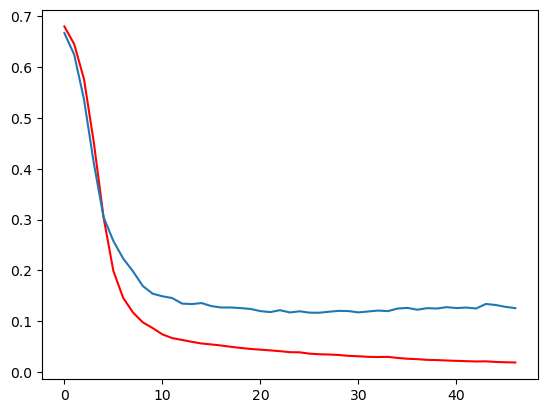

In [31]:
plt.plot(history.history['loss'],label = 'train',color ='r')
plt.plot(history.history['val_loss'],label = 'test')
# plt.lengend()
plt.show() # here in this we get the last the loss is decrease 

In [32]:
# here we showing the weight and bias for the fist layer
model.layers[0].get_weights() 

[array([[-0.28424665,  0.3605388 ,  0.17873415, -0.20283855, -0.12562397,
         -0.24010459,  0.09719283, -0.33066502, -0.1230771 ],
        [-0.09711519,  0.25075582,  0.03808416,  0.09287208, -0.10719222,
          0.21268173,  0.30454582, -0.34697694,  0.17863248],
        [ 0.05173144, -0.08612414, -0.41699517, -0.21023673, -0.2781742 ,
          0.25953126,  0.45503518, -0.09058847, -0.14971209],
        [ 0.21068515,  0.38014194, -0.30464032,  0.2297917 ,  0.4034579 ,
         -0.10796014,  0.37705308, -0.2806029 , -0.30628225],
        [ 0.39614302, -0.46733627,  0.13671158, -0.08499531, -0.08201661,
          0.02899376,  0.4452814 , -0.27749202,  0.16570042],
        [ 0.18029162, -0.00879896, -0.08312012,  0.01264726, -0.31202954,
         -0.02373314,  0.07787835,  0.23255637, -0.2396804 ],
        [-0.29350963, -0.02653404, -0.12975292, -0.00973718,  0.15677805,
         -0.29136172,  0.28388366, -0.07398117, -0.44731295],
        [-0.3079206 ,  0.04260992,  0.13029467, 

In [33]:
model.layers[1].get_weights() 

[array([[ 0.25772935, -0.28725642,  0.24435954, -0.01741546,  0.20543319,
         -0.07921929, -0.19395614, -0.44844756],
        [ 0.3095425 ,  0.47899896, -0.16776997, -0.2325157 ,  0.3919661 ,
         -0.05192734, -0.00221526, -0.25530317],
        [-0.3763553 ,  0.2614905 , -0.22813797,  0.57624984,  0.0580551 ,
          0.7266064 , -0.40203577, -0.16662183],
        [ 0.35917756, -0.23417626,  0.1044116 , -0.43985888,  0.23495775,
          0.67166454,  0.14295302, -0.4699852 ],
        [ 0.17909402,  0.43688962, -0.37268147, -0.2226247 , -0.34834978,
          0.57667506,  0.20012648, -0.15304615],
        [ 0.5405298 ,  0.26794562,  0.3163    ,  0.5603231 , -0.47840255,
          0.3558018 , -0.56864774, -0.0575813 ],
        [-0.2470231 , -0.31570217, -0.14463532, -0.55416036, -0.01571269,
         -0.3472866 ,  0.3741094 , -0.29707143],
        [ 0.20072302, -0.49520954,  0.2041955 , -0.39533827,  0.5667559 ,
          0.00466357,  0.15972109,  0.11419752],
        [ 0.2760

In [34]:
# now predict 
y_log = model.predict(x_test_scaler)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [35]:

y_pred = np.where(y_log>0.5,1,0)  # here we sopose the tharase hold = 0.5
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [36]:
accuracy_score(y_test,y_pred)

0.9649122807017544

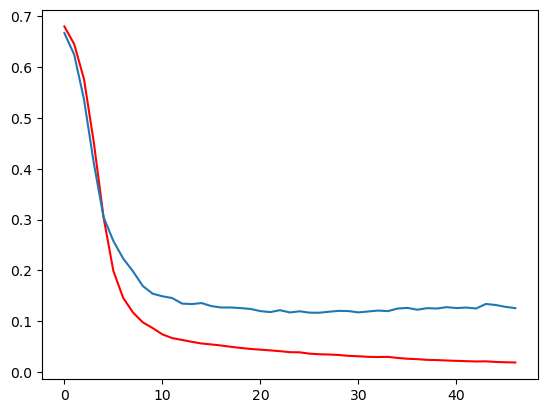

In [37]:
# here with ploting we chek the accuaray of the model 
plt.plot(history.history['loss'],color = 'r')
plt.plot(history.history['val_loss'])
plt.show()